<a href="https://colab.research.google.com/github/novojitdas/Computer-Vision/blob/main/colab/Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gradient Descent
**Gradient Descent** is an optimization algorithm used to minimize or maximize a function. It is commonly used to update the parameters of a model during the training process, with the **goal of finding the optimal values that minimize the error or loss function.**

In the context of machine learning, let's say you have a model with some parameters (weights and biases), and you want to find the best values for these parameters to make the model perform well on a specific task, such as image classification or language translation.

The basic idea of Gradient Descent is to iteratively update the model's parameters in the opposite direction of the gradient of the loss function with respect to those parameters. The gradient essentially indicates the direction of the steepest increase in the loss function, so moving in the opposite direction allows us to find the values that lead to the steepest decrease in the loss function, eventually converging towards the optimal values.

The algorithm works as follows:

- Initialize the model's parameters randomly.
- Compute the loss function based on the current parameter values and the training data.
- Calculate the gradient of the loss function with respect to each parameter.
- Update each parameter by subtracting a small fraction of the gradient (learning rate times the gradient) from the current value. This fraction is called the learning rate, and it determines the step size in each iteration.
- Repeat steps 2 to 4 until the loss function converges to a minimum (or reaches a satisfactory level).

There are variations of Gradient Descent, such as Stochastic Gradient Descent (SGD), Mini-batch Gradient Descent, and Adam, which aim to improve the algorithm's efficiency and convergence speed.

Gradient Descent is a fundamental optimization technique, and many machine learning algorithms and deep learning models rely on it to learn and update their parameters during training.


#SIGMOID ACTIVATION FUNCTION
sigmoid activation function, also known as the logistic function, is a type of mathematical function commonly used in machine learning and artificial neural networks. **It maps any real-valued number to a value between 0 and 1**. The sigmoid function is defined as:

f(x) = 1 / (1 + e^(-x))

where:

f(x) is the output of the sigmoid activation function for input x.
e is the base of the natural logarithm (approximately equal to 2.71828).
The graph of the sigmoid function looks like an S-shaped curve

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


# Method: Used to compute the sigmoid activation value
def sigmoid_activation(x):
    """
    :param x: Feature matrix
    :return: Predictions matrix
    """
    return 1.0 / (1 + np.exp(-x))


# Method: Used to obtain a set of predictions
def predict(x, w):
    """
    :param x: Feature matrix
    :param w: Weights matrix
    :return: Predictions matrix
    """
    # Take the dot product between the features and weight matrices to get the prediction matrix
    predictions = sigmoid_activation(x.dot(w))

    # Apply a step function threshold for the binary outputs
    predictions[predictions <= 0.5] = 0
    predictions[predictions > 0] = 1

    return predictions




# Generate a 2-class 2D classification problem with 1,000 data points
(x, y) = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.5, random_state=1)
# making y from a 1D array to a 2D array with a single column
y = y.reshape((y.shape[0]), 1)

# Insert a column of 1's as the last entry of the feature matrix (bias trick)
x = np.c_[x, np.ones((x.shape[0]))] #np.c_ -> concatenates x and the newly created array

# Split the data into training (50%) and testing (50%)
(train_x, test_x, train_y, test_y) = train_test_split(x, y, test_size=0.5, random_state=42)

# Initialize the weight matrix and list of losses
print('[INFO]: Training....')
w = np.random.randn(x.shape[1], 1)
losses = []

# Loop for the number of epochs
for epoch in np.arange(0, 500):
    # Take the dot product between the features and weight matrices to get the predictions matrix
    predictions = sigmoid_activation(train_x.dot(w))

    # Compute the error between the predictions and true values
    error = predictions - train_y
    loss = np.sum(error ** 2)
    losses.append(loss)

    # Compute the gradient (dot product between the transposed matrix of train_x and prediction errors)
    gradient = train_x.T.dot(error)

    # Update the weight matrix by 'nudging' it in the negative direction
    w += -0.01 * gradient # learning rate = 0.01

    # Check to see if an update should be displayed
    if epoch == 0 or (epoch+1) % 5 == 0:
        print('[INFO]: epoch={}, loss={:.4f}'.format(int(epoch + 1), loss))



[INFO]: Training....
[INFO]: epoch=1, loss=231.9361
[INFO]: epoch=5, loss=1.6486
[INFO]: epoch=10, loss=0.7391
[INFO]: epoch=15, loss=0.3404
[INFO]: epoch=20, loss=0.1913
[INFO]: epoch=25, loss=0.1313
[INFO]: epoch=30, loss=0.1018
[INFO]: epoch=35, loss=0.0846
[INFO]: epoch=40, loss=0.0733
[INFO]: epoch=45, loss=0.0652
[INFO]: epoch=50, loss=0.0591
[INFO]: epoch=55, loss=0.0541
[INFO]: epoch=60, loss=0.0501
[INFO]: epoch=65, loss=0.0467
[INFO]: epoch=70, loss=0.0437
[INFO]: epoch=75, loss=0.0411
[INFO]: epoch=80, loss=0.0389
[INFO]: epoch=85, loss=0.0368
[INFO]: epoch=90, loss=0.0350
[INFO]: epoch=95, loss=0.0333
[INFO]: epoch=100, loss=0.0318
[INFO]: epoch=105, loss=0.0304
[INFO]: epoch=110, loss=0.0292
[INFO]: epoch=115, loss=0.0280
[INFO]: epoch=120, loss=0.0269
[INFO]: epoch=125, loss=0.0258
[INFO]: epoch=130, loss=0.0249
[INFO]: epoch=135, loss=0.0240
[INFO]: epoch=140, loss=0.0232
[INFO]: epoch=145, loss=0.0224
[INFO]: epoch=150, loss=0.0216
[INFO]: epoch=155, loss=0.0209
[INFO]:

[INFO]: Evaluating....
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



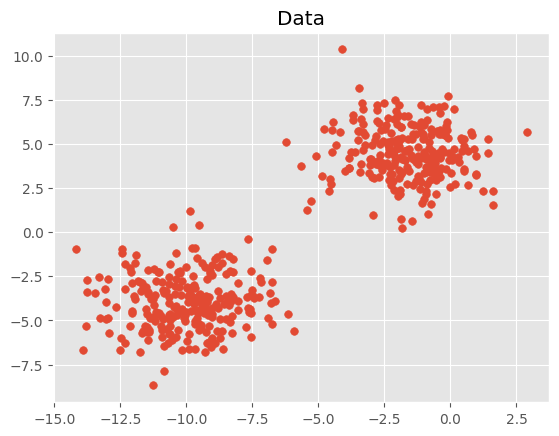

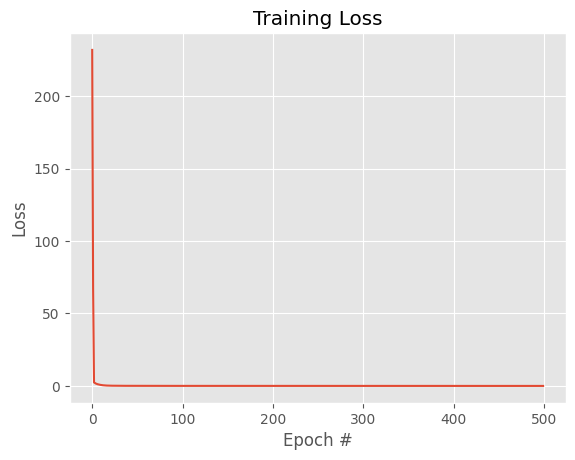

In [ ]:
# Evaluate the model
print('[INFO]: Evaluating....')
predictions = predict(test_x, w)
print(classification_report(test_y, predictions))

# Plot the classification (test) data
plt.style.use('ggplot')
plt.figure()
plt.title('Data')
plt.scatter(test_x[:, 0], test_x[:, 1], marker='o', s=30)

# Plot the loss over time
plt.style.use('ggplot')
plt.figure()
plt.title('Training Loss')
plt.plot(np.arange(0, 500), losses)
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.show()


#Stochastic Gradient Descent (SGD)
**Vanilla** implementation of gradient descent can be **slow to run on large datasets.** On the other hand, **Stochastic Gradient Descent (SGD) algorithm that computes the gradient and updates the weight matrix W on small batches on training data**, rather than the entire training set. while the modification leads to more noisy updates but also provide faster and no negative effects on loss and classification accuracy.

Vanilla algorithm will run slowly on large datasets like imagenet, where we have millions of training images.

**Pseudocode:**

**While True:<br>
  batch = next_training_batch(data, 256)<br>
  Wgradient = evaluate_gradient(loss,batch,W)<br>
  W += -alpha * Wgradient**

The only difference between Vanilla and SGD is next_training_batch. we will work using small sample batch rather then entire dataset.batch size is > 1, typically 32,64,128,256.

[INFO]: Training....
[INFO]: epoch=1, loss=0.3381
[INFO]: epoch=5, loss=0.0795
[INFO]: epoch=10, loss=0.0583
[INFO]: epoch=15, loss=0.0477
[INFO]: epoch=20, loss=0.0407
[INFO]: epoch=25, loss=0.0356
[INFO]: epoch=30, loss=0.0316
[INFO]: epoch=35, loss=0.0283
[INFO]: epoch=40, loss=0.0256
[INFO]: epoch=45, loss=0.0234
[INFO]: epoch=50, loss=0.0214
[INFO]: epoch=55, loss=0.0197
[INFO]: epoch=60, loss=0.0182
[INFO]: epoch=65, loss=0.0169
[INFO]: epoch=70, loss=0.0158
[INFO]: epoch=75, loss=0.0147
[INFO]: epoch=80, loss=0.0138
[INFO]: epoch=85, loss=0.0129
[INFO]: epoch=90, loss=0.0122
[INFO]: epoch=95, loss=0.0115
[INFO]: epoch=100, loss=0.0108
[INFO]: Evaluating....
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



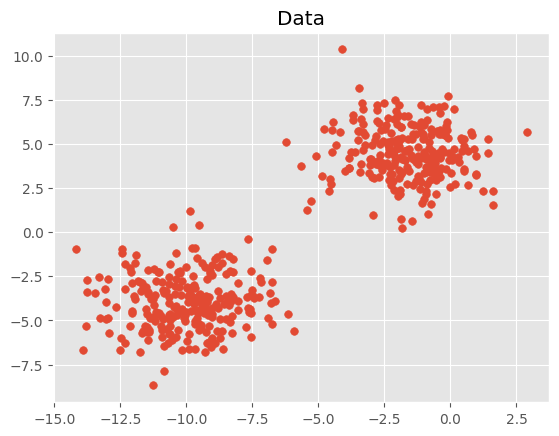

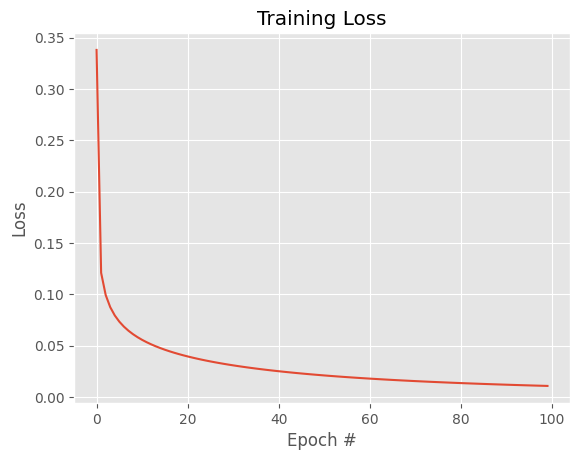

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

#Method: Used to compute the sigmoid activation value
def sigmoid_activation(x):
    """
    :param x: Feature matrix
    :return: Predictions matrix
    """
    return 1.0 / (1 + np.exp(-x))

# Method: Used to obtain a set of predictions
def predict(x, w):
    """
    :param x: Feature matrix
    :param w: Weights matrix
    :return: Predictions matrix
    """
    # Take the dot product between the features and weight matrices to get the prediction matrix
    predictions = sigmoid_activation(x.dot(w))

    # Apply a step function threshold for the binary outputs
    predictions[predictions <= 0.5] = 0
    predictions[predictions > 0] = 1

    return predictions


# Method: Used to create the next batch
def next_batch(x,y,batchSize):
  #loop over dataset 'x' in mini-batches
  for i in np.arange(0, x.shape[0], batchSize):
    yield(x[i:i + batchSize], y[i:i + batchSize])

# Generate a 2-class 2D classification problem with 1,000 data points
(x, y) = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.5, random_state=1)
# making y from a 1D array to a 2D array with a single column
y = y.reshape((y.shape[0]), 1)

# Insert a column of 1's as the last entry of the feature matrix (bias trick)
x = np.c_[x, np.ones((x.shape[0]))] #np.c_ -> concatenates x and the newly created array

# Split the data into training (50%) and testing (50%)
(train_x, test_x, train_y, test_y) = train_test_split(x, y, test_size=0.5, random_state=42)

# Initialize the weight matrix and list of losses
print('[INFO]: Training....')
w = np.random.randn(x.shape[1], 1)
losses = []

for epoch in np.arange(0,100):
  #initialize the total loss for the epoch
  epochLoss = []

  #loop over our data in batches
  for (batchX, batchY) in next_batch(x,y,32):
    predictions = sigmoid_activation(batchX.dot(w))
    error = predictions - batchY
    epochLoss.append(np.sum(error ** 2))
    gradient = batchX.T.dot(error)
    # Update the weight matrix by 'nudging' it in the negative direction
    w += -0.01 * gradient # learning rate = 0.01

  loss = np.average(epochLoss)
  losses.append(loss)

  #display
  if epoch == 0 or (epoch+1) % 5 == 0:
      print('[INFO]: epoch={}, loss={:.4f}'.format(int(epoch + 1), loss))




# Evaluate the model
print('[INFO]: Evaluating....')
predictions = predict(test_x, w)
print(classification_report(test_y, predictions))

# Plot the classification (test) data
plt.style.use('ggplot')
plt.figure()
plt.title('Data')
plt.scatter(test_x[:, 0], test_x[:, 1], marker='o', s=30)

# Plot the loss over time
plt.style.use('ggplot')
plt.figure()
plt.title('Training Loss')
plt.plot(np.arange(0, 100), losses)
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.show()

Comparing vanilla algorithms with SGD, we can see that loss is lower at 100th epoch in SGD (SGD= 0.108, Vanilla= 0.318). This difference is due to the multiple weight updates per epoch.Giving our model more chances to learn from the updates made to the weight matrix. its very effective for large datasets.



#Regularization
Regularization helps us control our model capacity, ensuring that our models are better at making (correct) classifications on data points that they were not trained on, which we call the ability to generalize. If we don’t apply regularization, our classifiers can easily become too complex and overfit to our training data, in which case we lose the ability to generalize to our testing data (and data points outside the testing set as well, such as new images)

There are various types of regularization techniques

- L1 regularization

- L2 regularization (weight decay)

Other Types:

Explicit - (Example: Dropout)

Implicit - (Example: data augmentation and early stopping.)

However, too much regularization can be a bad thing. We can run the risk of underfitting, in which case our model performs poorly on the training data and is not able to model the relationship between the input data and output class labels (because we limited model capacity too much)

![green](https://b2633864.smushcdn.com/2633864/wp-content/uploads/2021/04/regularization_graph.png?lossy=1&strip=1&webp=1)

 An example of underfitting (orange line), overfitting (blue line), and generalizing (green line). The orange line is an example of underfitting — we are not capturing the relationship between the points. On the other hand, the blue line is an example of overfitting — we have too many parameters in our model, and while it hits all points in the dataset, it also wildly varies between the points. Our goal when building deep learning classifiers is to obtain these types of “green functions” that fit our training data nicely, but avoid overfitting. Regularization can help us obtain this type of desired fit.

 In practice you may find that regularization hurts your training accuracy slightly, but actually increases your testing accuracy.regularization penalty, a function that operates on our weight matrix. The regularization penalty is commonly written as a function, R(W). Example

```
penalty = 0
for i in np.arange(0, W.shape[0]):
	for j in np.arange(0, W.shape[1]):
		penalty += (W[i][j] ** 2)
```
The sum of squares in the L2 regularization penalty discourages large weights in our matrix W, preferring smaller ones. Why might we want to discourage large weight values? In short, by penalizing large weights, we can improve the ability to generalize, and thereby reduce overfitting.

source: https://pyimagesearch.com/2016/09/19/understanding-regularization-for-image-classification-and-machine-learning/


#Regularization Applied to Image Classification

In [8]:
#import dataset
!wget https://pyimagesearch-code-downloads.s3.us-west-2.amazonaws.com/understanding-regularization/understanding-regularization.zip
!unzip -qq understanding-regularization.zip
%cd understanding-regularization

--2023-08-09 12:31:18--  https://pyimagesearch-code-downloads.s3.us-west-2.amazonaws.com/understanding-regularization/understanding-regularization.zip
Resolving pyimagesearch-code-downloads.s3.us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3.us-west-2.amazonaws.com)... 3.5.80.164, 52.218.217.121, 52.92.248.114, ...
Connecting to pyimagesearch-code-downloads.s3.us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3.us-west-2.amazonaws.com)|3.5.80.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 197007501 (188M) [application/zip]
Saving to: ‘understanding-regularization.zip’

understanding-regul 100%[===================>] 187.88M  51.3MB/s    in 3.8s    

2023-08-09 12:31:22 (48.9 MB/s) - ‘understanding-regularization.zip’ saved [197007501/197007501]

/content/understanding-regularization


In [13]:
# import the necessary packages
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from pyimagesearch.preprocessing import SimplePreprocessor
from pyimagesearch.datasets import SimpleDatasetLoader
from imutils import paths

args = {
	"dataset": "dataset/animals"
}

# grab the list of image paths
print("[INFO] loading images...")
imagePaths = list(paths.list_images(args["dataset"]))

# initialize the image preprocessor, load the dataset from disk,
# and reshape the data matrix
sp = SimplePreprocessor(32, 32)
sdl = SimpleDatasetLoader(preprocessors=[sp])
(data, labels) = sdl.load(imagePaths, verbose=500)
data = data.reshape((data.shape[0], 3072))

# encode the labels as integers
le = LabelEncoder()
labels = le.fit_transform(labels)

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.25, random_state=42)

# loop over our set of regularizers
for r in (None, "l1", "l2"):
	# train a SGD classifier using a softmax loss function and the
	# specified regularization function for 10 epochs
	print("[INFO] training model with '{}' penalty".format(r))
	model = SGDClassifier(loss="log_loss", penalty=r, max_iter=100,
		learning_rate="constant", tol=1e-3, eta0=0.01, random_state=12)
	model.fit(trainX, trainY)

	# evaluate the classifier
	acc = model.score(testX, testY)
	print("[INFO] {} penalty accuracy: {:.2f}%".format(r,
		acc * 100))

[INFO] loading images...
[INFO] processed 500/3000
[INFO] processed 1000/3000
[INFO] processed 1500/3000
[INFO] processed 2000/3000
[INFO] processed 2500/3000
[INFO] processed 3000/3000
[INFO] training model with 'None' penalty
[INFO] None penalty accuracy: 49.33%
[INFO] training model with 'l1' penalty
[INFO] l1 penalty accuracy: 50.13%
[INFO] training model with 'l2' penalty
[INFO] l2 penalty accuracy: 54.13%
